In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

## Perform SVD and interpret

In [2]:
movie_names = ['American Pie', 'Shrek', 'Titanic', 'The Godfather', 'Avatar', 'Star Wars']
user_names = ['Ben', 'Tom', 'John', 'Fred', 'Jack']

data = np.array([
    [8, 7, 1, -1, 4],
    [9, 7, 2, 5, 6],
    [1, 4, 9, -1, 3],
    [3, -1, 8, 5, 4],
    [-1, 3, -1, 9, 9],
    [5, 1, 4, 10, -1]
], dtype=np.float64)

missing = data == -1
known = missing == False

In [3]:
# This is from the exercise sheet
mean_of_known = 5.5

# A more elaborate solution would be to replace with the known data average
# mean_of_known = np.mean(data[known])
print(mean_of_known)
data[missing] = mean_of_known

5.5


In [4]:
U, s, Vt = np.linalg.svd(data, full_matrices=True)

print('Matrix shapes:', U.shape, s.shape, Vt.shape)

S = np.zeros((6, 5))
S[:5, :5] = np.diag(s)

# make sure everything is fine
assert np.allclose(data, U.dot(S).dot(Vt))

Matrix shapes: (6, 6) (5,) (5, 5)


In [5]:
Vt.shape

(5, 5)

Text(0, 0.5, 'The Seriousness Axis')

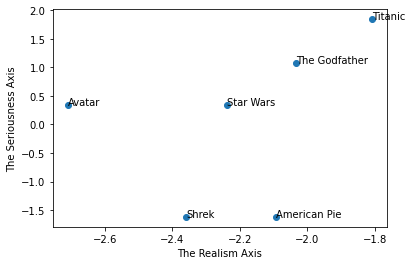

In [ ]:
# Keep only two values to visualize
k = 2

# plot representations of movies

u1u2 = U.dot(np.sqrt(S))[:, :2].T

plt.figure()
plt.scatter(*u1u2)
for u1, u2, name in zip(*u1u2, movie_names):
    plt.gca().annotate(name, (u1, u2))

plt.xlabel('The Realism Axis')
plt.ylabel('The Seriousness Axis')

Text(0, 0.5, 'The Seriousness Axis')

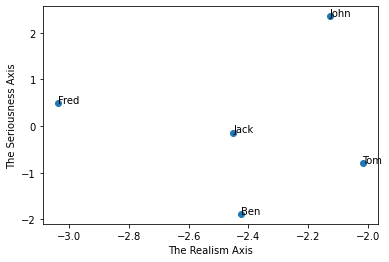

In [ ]:
# plot representations of users

v1v2 = np.sqrt(S).dot(Vt)[:k, :]

plt.figure()
plt.scatter(*v1v2)
for v1, v2, name in zip(*v1v2, user_names):
    plt.gca().annotate(name, (v1, v2))
plt.xlabel('The Realism Axis')
plt.ylabel('The Seriousness Axis')

In [ ]:
k = 2
Sk = S.copy()
Sk[k:, k:] = 0
Ak = U.dot(Sk).dot(Vt)

#check the approximation theorems
print(np.linalg.norm(data - Ak, 2), S[k, k]) # Euclidean norm
print(np.linalg.norm(data - Ak, 'fro'), math.sqrt(np.sum(S[k:, k:]**2))) # Frobenius norm

7.090333942170117 7.090333942170116
7.638523480268871 7.63852348026887


## Add new user

SVD cannot natively handle new users or new items.

In [ ]:
bob = np.array([[1, -1, -1, 6, -1, 10]], dtype=np.float64) # 2d array such that dimensions match later
bob[bob == -1] = mean_of_known

(6, 6) (6, 6) (6, 6)


Text(0, 0.5, 'The Seriousness Axis')

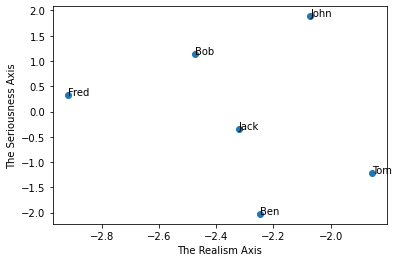

In [ ]:
# a way of doing it: SVD from scratch (evaluating Bob changes the system)
k = 2

datab = np.append(data, bob.T, 1)
Ub, sb, Vtb = np.linalg.svd(datab, full_matrices=True)
Sb = np.diag(sb)

print(Ub.shape, Sb.shape, Vtb.shape)

v1v2b = np.sqrt(Sb).dot(Vtb)[:k, :]

plt.figure()
plt.scatter(*v1v2b)
for v1, v2, name in zip(*v1v2b, user_names + ['Bob']):
    plt.gca().annotate(name, (v1, v2))
plt.xlabel('The Realism Axis')
plt.ylabel('The Seriousness Axis')

In [ ]:
# We can now fill in missing ratings for Bob (hint -> Project) 
Skb = Sb.copy()
Skb[k:, k:] = 0

Akb = Ub.dot(Skb).dot(Vtb)

bob_predicted = Akb[:, -1].ravel()

for i in reversed(np.argsort(bob_predicted)):
    print(movie_names[i], '{:.2}'.format(bob_predicted[i]))

Star Wars 7.6
Avatar 7.0
Titanic 6.7
The Godfather 6.4
Shrek 4.2
American Pie 2.3


Text(0, 0.5, 'The Seriousness Axis')

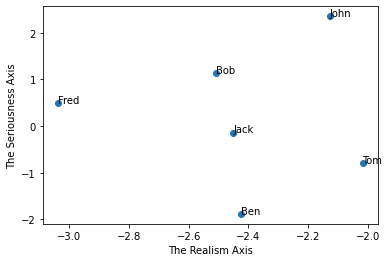

In [ ]:
# alternatively, a less 'correct' solution but one that does not require to recompute the SVD resolves as following
# notice we don't necessarily care about the scale but the angles between the vectors
k = 2

# if we want to keep the scales same as before we have to divide. Keep in mind A^T \times U = VS
v1v2 = (data.T.dot(U)[:, :k] / np.diagonal(np.sqrt(S[:k, :k]))).T
U_bob = bob.dot(U)[:, :k] / np.diagonal(np.sqrt(S[:k, :k]))
v1v2b = np.append(v1v2, U_bob.T, 1)
plt.scatter(*v1v2b)
for v1, v2, name in zip(*v1v2b, user_names + ['Bob']):
    plt.gca().annotate(name, (v1, v2))
    
plt.xlabel('The Realism Axis')
plt.ylabel('The Seriousness Axis')

In [ ]:
# In this case new predictions could be calculated as follows
k = 2 # you can check this gives back the original predictions if k == 6
U_bob = bob.dot(U[:, :k])
bob_ = U[:, :k].dot(U_bob.T)
bob_predicted = bob_[:].ravel()
for i in reversed(np.argsort(bob_predicted)):
    print(movie_names[i], '{:.2}'.format(bob_predicted[i]))

Avatar 7.2
Titanic 6.6
The Godfather 6.3
Star Wars 6.0
Shrek 4.1
American Pie 3.4
